In [43]:
import pandas as pd
import urllib.request
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
year = '2018'

for month in range(1, 13):
    file_name = '{0}{1:02d}-citibike-tripdata.csv.zip'.format(year, month)
    print(file_name)
    url = 'https://s3.amazonaws.com/tripdata/' + file_name
    urllib.request.urlretrieve(url, file_name)

201801-citibike-tripdata.csv.zip
201802-citibike-tripdata.csv.zip
201803-citibike-tripdata.csv.zip
201804-citibike-tripdata.csv.zip
201805-citibike-tripdata.csv.zip
201806-citibike-tripdata.csv.zip
201807-citibike-tripdata.csv.zip
201808-citibike-tripdata.csv.zip
201809-citibike-tripdata.csv.zip
201810-citibike-tripdata.csv.zip
201811-citibike-tripdata.csv.zip
201812-citibike-tripdata.csv.zip


In [24]:
# Putting files together

bike_data = None

for month in range(1, 3):
    
    print(month)
    file_name = '{0}{1:02d}-citibike-tripdata.csv.zip'.format(year, month)
    monthly_data = pd.read_csv(file_name, compression = 'zip')
    
    if bike_data is None:
        bike_data = monthly_data
    else:
        bike_data = pd.concat([bike_data, monthly_data])
    

1
2


* How many trips have been recorded total during the chosen period?

In [26]:
bike_data.shape[0]

1562108

## Downsampling

In [37]:
bike_data = bike_data.sample(1000)

In [38]:
bike_data.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
418598,423,2018-02-10 14:40:49.157,2018-02-10 14:47:52.803,497,E 17 St & Broadway,40.737050,-73.990093,212,W 16 St & The High Line,40.743349,-74.006818,33436,Subscriber,1974,1
350712,218,2018-02-09 19:06:33.627,2018-02-09 19:10:11.664,467,Dean St & 4 Ave,40.683125,-73.978951,3419,Douglass St & 4 Ave,40.679279,-73.981540,15019,Subscriber,1985,1
268012,440,2018-01-13 12:00:27.466,2018-01-13 12:07:47.572,450,W 49 St & 8 Ave,40.762272,-73.987882,448,W 37 St & 10 Ave,40.756604,-73.997901,20164,Subscriber,1964,1
32603,501,2018-02-23 23:36:55.854,2018-02-23 23:45:17.693,173,Broadway & W 49 St,40.760683,-73.984527,498,Broadway & W 32 St,40.748549,-73.988084,31077,Customer,1969,0
51464,425,2018-02-09 15:30:39.447,2018-02-09 15:37:44.864,237,E 11 St & 2 Ave,40.730473,-73.986724,402,Broadway & E 22 St,40.740343,-73.989551,31010,Subscriber,1990,1


In [39]:
bike_data['starttime'] = pd.to_datetime(bike_data['starttime'])
bike_data['stoptime']  = pd.to_datetime(bike_data['stoptime'])

In [40]:
bike_data = bike_data.assign(duration = bike_data[['starttime', 'stoptime']].apply(lambda x: x[1]-x[0], axis=1))

In [41]:
bike_data[['starttime', 'stoptime', 'duration']].head()

,starttime,stoptime,duration
418598,2018-02-10 14:40:49.157,2018-02-10 14:47:52.803,00:07:03.646000
350712,2018-02-09 19:06:33.627,2018-02-09 19:10:11.664,00:03:38.037000
268012,2018-01-13 12:00:27.466,2018-01-13 12:07:47.572,00:07:20.106000
32603,2018-02-23 23:36:55.854,2018-02-23 23:45:17.693,00:08:21.839000
51464,2018-02-09 15:30:39.447,2018-02-09 15:37:44.864,00:07:05.417000


In [45]:
bike_data = bike_data.assign(age = bike_data['birth year'].apply(lambda year: 2019 - year))

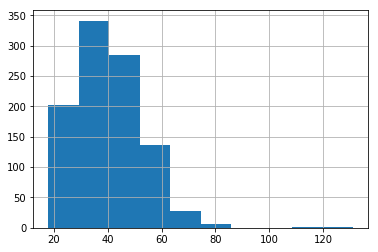

In [46]:
bike_data['age'].hist()

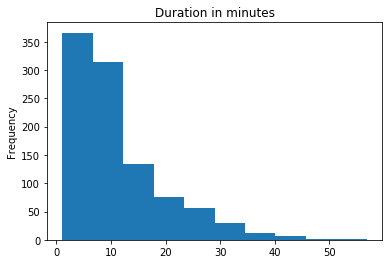

In [55]:
(bike_data['duration'][bike_data['duration'] < pd.Timedelta(hours=1)] / pd.Timedelta(minutes=1)).plot.hist()
_ = plt.title('Duration in minutes')

## How many trips lasted more than 1 hour?

In [54]:
bike_data['duration'][bike_data['duration'] > pd.Timedelta(hours=1)]

160996   04:49:21.749000
139789   01:35:56.882000
537934   01:15:45.118000
324600   14:42:43.555000
Name: duration, dtype: timedelta64[ns]

## Saving the table in Excel format

In [56]:
bike_data.to_excel('bike_data_1000_trips.xlsx', index=False)

In [57]:
bike_data.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,duration,age
418598,423,2018-02-10 14:40:49.157,2018-02-10 14:47:52.803,497,E 17 St & Broadway,40.737050,-73.990093,212,W 16 St & The High Line,40.743349,-74.006818,33436,Subscriber,1974,1,00:07:03.646000,45
350712,218,2018-02-09 19:06:33.627,2018-02-09 19:10:11.664,467,Dean St & 4 Ave,40.683125,-73.978951,3419,Douglass St & 4 Ave,40.679279,-73.981540,15019,Subscriber,1985,1,00:03:38.037000,34
268012,440,2018-01-13 12:00:27.466,2018-01-13 12:07:47.572,450,W 49 St & 8 Ave,40.762272,-73.987882,448,W 37 St & 10 Ave,40.756604,-73.997901,20164,Subscriber,1964,1,00:07:20.106000,55
32603,501,2018-02-23 23:36:55.854,2018-02-23 23:45:17.693,173,Broadway & W 49 St,40.760683,-73.984527,498,Broadway & W 32 St,40.748549,-73.988084,31077,Customer,1969,0,00:08:21.839000,50
51464,425,2018-02-09 15:30:39.447,2018-02-09 15:37:44.864,237,E 11 St & 2 Ave,40.730473,-73.986724,402,Broadway & E 22 St,40.740343,-73.989551,31010,Subscriber,1990,1,00:07:05.417000,29
